In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from pyod.models.knn import KNN 

from sklearn.feature_selection import( 
    RFECV,
    SequentialFeatureSelector,
    SelectFromModel
)

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import(
    RandomForestClassifier,
    HistGradientBoostingClassifier
)

# models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    HistGradientBoostingClassifier
)

# scripts 
from src.wrapped import Wrapped
from src.analysesV02 import Analytics
from src.trainV02 import TrainModels

In [2]:
# classes
ac = Analytics()
tm = TrainModels()
wp = Wrapped(
    '../data/row/',
    '../data/processed/',
    '../data/files/'
)

# models
models = np.array([
    GaussianNB(),
    KNeighborsClassifier(), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(), 
    HistGradientBoostingClassifier(),
    LGBMClassifier(),
    MLPClassifier(),
    SVC(),
])

models_class_weight = np.array([
    DecisionTreeClassifier(class_weight='balanced'), 
    RandomForestClassifier(class_weight='balanced', random_state = 0, n_jobs = -1), 
    LGBMClassifier(class_weight='balanced'),
])

# Importando dados para treinamento

In [3]:
df = wp.load_data('df_instrumentos_features_selecionadas')

In [4]:
df = wp.load_data('df_instrumentos_features_selecionadas')

# instrumentos de sopro:
inst_sopro = ["clarinet", "trombone", "flute", "trumpet", "saxophone"]
df = df[df['instrumento'].isin(inst_sopro)]

- Definindo as variaveis de treino e o target

In [5]:
le = LabelEncoder()
df['labels'] = le.fit_transform(df.instrumento)

In [6]:
X = df.drop(columns=['labels', 'instrumento','file_name'])
y = df['labels']

# TESTE 1: Balanceamento

- 1° Opção: Balanceamento das classes com SMOTH

In [7]:
t1_acuracy_models = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y.to_frame()) for model in models]

dict_results_t1 = {
    'Naive Bayes': t1_acuracy_models[0],
    'KNN': t1_acuracy_models[1],
    'Arvore de Decisão': t1_acuracy_models[2],
    'Floresta Aleatoria': t1_acuracy_models[3],
    'HistGradientBoosting': t1_acuracy_models[4],
    'LIGHTGBM': t1_acuracy_models[5],
    'MLP': t1_acuracy_models[6],
    'SVC': t1_acuracy_models[7],
}

dict_results_t1

Acuracia do modelo GaussianNB() do Fold 0: 0.5590062111801242
Acuracia do modelo GaussianNB() do Fold 1: 0.6428571428571429
Acuracia do modelo GaussianNB() do Fold 2: 0.5993788819875776
Acuracia do modelo GaussianNB() do Fold 3: 0.5962732919254659
Acuracia do modelo GaussianNB() do Fold 4: 0.6230529595015576
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.468944099378882
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.4782608695652174
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.5093167701863354
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.4813664596273292
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.5389408099688473
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.531055900621118
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.5341614906832298
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.5652173913043478
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.5403726708074534
Acuracia do modelo DecisionTreeClass

{'Naive Bayes': 0.6041136974903736,
 'KNN': 0.5497397496178479,
 'Arvore de Decisão': 0.5450662074392265,
 'Floresta Aleatoria': 0.5868641280160988,
 'HistGradientBoosting': 0.6115721445018479,
 'LIGHTGBM': 0.6286649510135898,
 'MLP': 0.6114054073478232,
 'SVC': 0.5987647781583174}

- 2° Opção: Class Weight

In [8]:
acuracy_models_class_weight  = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y.to_frame(), weight=True) for model in models_class_weight]

dict_results_class_weight = {
    'Arvore de Decisão': acuracy_models_class_weight[0],
    'Floresta Aleatoria': acuracy_models_class_weight[1],
    'LIGHTGBM': acuracy_models_class_weight[2],
}

dict_results_class_weight

Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 0: 0.48757763975155277
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 1: 0.4751552795031056
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 2: 0.5279503105590062
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 3: 0.5341614906832298
Acuracia do modelo DecisionTreeClassifier(class_weight='balanced') do Fold 4: 0.5109034267912772
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 0: 0.6832298136645962
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 1: 0.7018633540372671
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 2: 0.7204968944099379
Acuracia do modelo RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0) do Fold 3: 0.6801242236024845
Acuracia do modelo

{'Arvore de Decisão': 0.5885853171915748,
 'Floresta Aleatoria': 0.60026973162284,
 'LIGHTGBM': 0.6099428135185957}

# TESTE 2: Remover Outlier

- Treinar modelo de classificação de outilier

In [9]:
detector_outilier = KNN()

new_df = df.drop(columns=['instrumento','file_name'])

detector_outilier.fit(new_df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

- Checar numeros de outilers e não outilers<br/>
**0 (False) Não é outiler**<br/>
**1 (True) É outiler**

In [10]:
previsions = detector_outilier.labels_
np.unique(previsions, return_counts=True)

(array([0, 1]), array([1448,  161]))

- Distancia euclidiana dos registros

In [11]:
confiance_previsions = detector_outilier.decision_scores_
confiance_previsions

array([ 573.28682546, 1165.41972437,  529.69517971, ...,  750.32724957,
        748.97427048,  424.90582813])

- Grafico

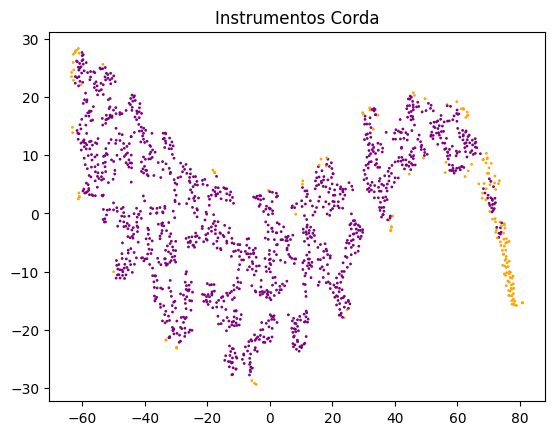

In [12]:
ac.graphic_anomalies(df, previsions,'Instrumentos Corda')

- Checar os outilers

In [13]:
# pegando indice dos registros que são outilers
outilers_id = [previsions[i] == 1 for i in range(previsions.shape[0])]
outilers = df.iloc[outilers_id,:]
outilers

tonnetz0  tonnetz1   chroma1   chroma2   chroma3   chroma4   chroma5  \
1876 -0.044667  0.260524  0.692127  0.238955  0.029413  0.424056  0.732275   
1878  0.089747  0.253008  0.299878  0.225017  0.544357  0.164941  0.079692   
1886  0.002779  0.015584  0.311722  0.319367  0.339069  0.368589  0.345589   
1888  0.108679  0.066236  0.484411  0.352953  0.433525  0.316416  0.265250   
1897  0.040330  0.013987  0.226904  0.302980  0.674932  0.560282  0.423103   
...        ...       ...       ...       ...       ...       ...       ...   
7151 -0.215709  0.074658  0.095596  0.119745  0.361354  0.896803  0.408373   
7153  0.095131  0.165130  0.409808  0.178644  0.131329  0.086917  0.195207   
7156 -0.148693  0.003055  0.543909  0.820975  0.261659  0.262984  0.201507   
7159 -0.040215  0.031151  0.587902  0.642199  0.661011  0.675489  0.697853   
7160  0.010755  0.116696  0.688803  0.655537  0.653487  0.669022  0.717870   

       chroma6   chroma7       mfcc0  ...  spectral_centroid  spectral_onset  \
1876  0.106237  0.264656 -178.568253  ...        1872.058375        0.862944   
1878  0.119684  0.194826 -211.757339  ...        1999.856294        1.274141   
1886  0.443560  0.344975  -85.485229  ...        3154.871456        1.945904   
1888  0.316138  0.292531 -121.484428  ...        1992.119222        1.766695   
1897  0.323710  0.402272 -124.647331  ...        1949.869060        1.131823   
...        ...       ...         ...  ...                ...             ...   
7151  0.369947  0.177898 -387.084808  ...        3394.058894        1.074963   
7153  0.238547  0.105908 -196.057907  ...        1466.013189        1.140587   
7156  0.296120  0.160154 -182.133682  ...        2612.295812        0.958099   
7159  0.718583  0.482416 -276.234711  ...         285.508118        0.854189   
7160  0.756882  0.647046 -287.831879  ...         249.003248        0.802066   

      spectral_rolloff  spectogram  mel_spectogram  zero_crossing_rate  \
1876       2738.513835  -70.011116      -80.000000            0.139929   
1878       3282.789275  -58.643265      -71.021973            0.176906   
1886       5838.245903  -44.260166      -62.325306            0.232276   
1888       4726.313261  -42.178364      -41.680836            0.041709   
1897       3117.917883  -63.385639      -78.626289            0.151718   
...                ...         ...             ...                 ...   
7151       6651.736344  -53.667458      -76.665230            0.194558   
7153       2337.326779  -75.481300      -79.999992            0.101459   
7156       4009.572352  -64.094101      -80.000000            0.170468   
7159        403.660127  -16.440603      -14.334520            0.014532   
7160        359.044929  -13.985688      -21.471106            0.009498   

      zero_crossing  instrumento          file_name  labels  
1876          30932     clarinet  001020_395520.ogg       0  
1878          39102     clarinet  001563_195840.ogg       0  
1886          51374     clarinet  009170_188160.ogg       0  
1888           9216     clarinet  009884_138240.ogg       0  
1897          33537     clarinet  015674_115200.ogg       0  
...             ...          ...                ...     ...  
7151          43089      trumpet   120220_76800.ogg       4  
7153          22454      trumpet   125119_11520.ogg       4  
7156          37702      trumpet  130811_399360.ogg       4  
7159           3213      trumpet  138998_691200.ogg       4  
7160           2100      trumpet   138999_76800.ogg       4  

[161 rows x 47 columns]

In [14]:
outilers.instrumento.value_counts()

flute        103
clarinet      20
saxophone     19
trumpet       10
trombone       9
Name: instrumento, dtype: int64

- Agora vamos remover os outilers da nossa base

In [15]:
# pegando indice dos registros que não são outilers
outilers_id =[previsions[i] == 0 for i in range(previsions.shape[0])]
df_train = df.iloc[outilers_id,:]
df_train

tonnetz0  tonnetz1   chroma1   chroma2   chroma3   chroma4   chroma5  \
1875  0.060383  0.017910  0.319152  0.367783  0.465361  0.399524  0.357706   
1877 -0.102407 -0.053821  0.007352  0.016456  0.251515  0.982690  0.649991   
1879  0.137429 -0.165245  0.004996  0.004829  0.009536  0.313501  1.000000   
1880  0.236781 -0.104811  0.360671  0.143619  0.062925  0.141207  0.458111   
1881  0.251144  0.276060  0.757470  0.276578  0.013081  0.137285  0.914434   
...        ...       ...       ...       ...       ...       ...       ...   
7161  0.031326  0.036042  0.281165  0.467478  0.383710  0.385898  0.358991   
7162  0.024069 -0.064162  0.038717  0.051984  0.156484  0.528343  0.865360   
7163  0.046916  0.068088  0.517141  0.282860  0.547268  0.444383  0.516097   
7164  0.109233  0.002179  0.271734  0.290186  0.454663  0.332584  0.266866   
7165  0.143650  0.051470  0.110378  0.162037  0.413377  0.162070  0.238701   

       chroma6   chroma7       mfcc0  ...  spectral_centroid  spectral_onset  \
1875  0.343498  0.282757    8.203455  ...        2328.546611        1.093156   
1877  0.123668  0.015163 -170.240860  ...        1571.665681        0.959548   
1879  0.247865  0.029246 -200.479965  ...        1302.617113        0.927032   
1880  0.159797  0.037194 -225.307404  ...        1104.750913        1.166350   
1881  0.177750  0.035843 -196.740616  ...         930.040460        0.972946   
...        ...       ...         ...  ...                ...             ...   
7161  0.379168  0.286116 -221.750122  ...         896.653459        1.242603   
7162  0.228249  0.063890 -213.012329  ...        1280.731144        1.535133   
7163  0.406917  0.322084  -35.486549  ...        2309.708871        1.049440   
7164  0.341721  0.481044 -134.787796  ...        2370.998419        1.259253   
7165  0.199392  0.427850   42.758762  ...        1835.735303        1.036834   

      spectral_rolloff  spectogram  mel_spectogram  zero_crossing_rate  \
1875       5092.952266  -52.844872      -68.585281            0.105613   
1877       3635.089465  -61.261280      -78.551147            0.036253   
1879       2510.017073  -61.047974      -77.810928            0.029619   
1880       1975.259208  -66.297119      -78.115021            0.066677   
1881       1324.891525  -62.295158      -79.964806            0.063943   
...                ...         ...             ...                 ...   
7161       1782.859289  -42.632786      -42.830780            0.041767   
7162       1930.644010  -52.891537      -79.643761            0.078466   
7163       5199.019529  -37.911655      -57.435429            0.095421   
7164       5153.205266  -53.025776      -79.120621            0.126226   
7165       3431.498276  -43.174435      -42.306446            0.093954   

      zero_crossing  instrumento          file_name  labels  
1875          23362     clarinet   000726_72960.ogg       0  
1877           8015     clarinet  001210_184320.ogg       0  
1879           6548     clarinet  001630_134400.ogg       0  
1880          14813     clarinet       003872_0.ogg       0  
1881          14130     clarinet   005201_99840.ogg       0  
...             ...          ...                ...     ...  
7161           9231      trumpet  141573_157440.ogg       4  
7162          17360      trumpet   149060_46080.ogg       4  
7163          21114      trumpet   149506_92160.ogg       4  
7164          27933      trumpet  150659_195840.ogg       4  
7165          20772      trumpet  154048_192000.ogg       4  

[1448 rows x 47 columns]

- Treinar modelos sem outlier e balanceameto

In [16]:
X_rm_outilers = df_train.drop(columns=['labels', 'instrumento','file_name'])
y_rm_outilers = df_train['labels'].to_frame()

t2_acuracy_models = [tm.cross_validate_balancead(k=5, model=model,X=X_rm_outilers,  y=y_rm_outilers) for model in models]

dict_results_t2 = {
    'Naive Bayes': t2_acuracy_models[0],
    'KNN': t2_acuracy_models[1],
    'Arvore de Decisão': t2_acuracy_models[2],
    'Floresta Aleatoria': t2_acuracy_models[3],
    'HistGradientBoosting': t2_acuracy_models[4],
    'LIGHTGBM': t2_acuracy_models[5],
    'MLP': t2_acuracy_models[6],
    'SVC': t2_acuracy_models[7],
}

dict_results_t2

Acuracia do modelo GaussianNB() do Fold 0: 0.5379310344827586
Acuracia do modelo GaussianNB() do Fold 1: 0.6448275862068965
Acuracia do modelo GaussianNB() do Fold 2: 0.596551724137931
Acuracia do modelo GaussianNB() do Fold 3: 0.5847750865051903
Acuracia do modelo GaussianNB() do Fold 4: 0.6332179930795848
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.4517241379310345
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.4862068965517241
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.5
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.47750865051903113
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.5363321799307958
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.5344827586206896
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.5137931034482759
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.5724137931034483
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.5501730103806228
Acuracia do modelo DecisionTreeClassifier() do Fo

{'Naive Bayes': 0.6090693027989187,
 'KNN': 0.5999373851210416,
 'Arvore de Decisão': 0.5964015368187641,
 'Floresta Aleatoria': 0.6039248929808921,
 'HistGradientBoosting': 0.6100767951399956,
 'LIGHTGBM': 0.6163172857450174,
 'MLP': 0.6065499868823188,
 'SVC': 0.6017057248606991}

# TESTE 3: Features por Correlação

In [17]:
df_corr = df.drop(columns=['instrumento', 'file_name', 'labels']).corr().unstack().reset_index().dropna()
df_corr.rename(columns = {'level_0': 'features_a', 'level_1': 'features_b', 0:'correlacao'}, inplace = True)
df_corr

features_a          features_b  correlacao
0          tonnetz0            tonnetz0    1.000000
1          tonnetz0            tonnetz1    0.099321
2          tonnetz0             chroma1   -0.063724
3          tonnetz0             chroma2   -0.161056
4          tonnetz0             chroma3    0.216762
...             ...                 ...         ...
1931  zero_crossing    spectral_rolloff    0.662313
1932  zero_crossing          spectogram   -0.098559
1933  zero_crossing      mel_spectogram   -0.124501
1934  zero_crossing  zero_crossing_rate    0.999999
1935  zero_crossing       zero_crossing    1.000000

[1936 rows x 3 columns]

- Correlação Positia

In [18]:
corr_posit = df_corr.query('correlacao > 0.5 and correlacao < 1.0')
corr_posit

features_a          features_b  correlacao
271              chroma5             chroma6    0.502817
314              chroma6             chroma5    0.502817
430                mfcc0      spectral_band2    0.525263
435                mfcc0    spectral_rolloff    0.506348
631                mfcc5               mfcc6    0.535504
...                  ...                 ...         ...
1887  zero_crossing_rate    spectral_rolloff    0.662260
1891  zero_crossing_rate       zero_crossing    0.999999
1929       zero_crossing   spectral_centroid    0.826812
1931       zero_crossing    spectral_rolloff    0.662313
1934       zero_crossing  zero_crossing_rate    0.999999

[64 rows x 3 columns]

In [19]:
len(corr_posit.features_a.unique()), corr_posit.features_a.unique()

(29,
 array(['chroma5', 'chroma6', 'mfcc0', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8',
        'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14',
        'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'chroma9', 'chroma10',
        'chroma11', 'spectral_band2', 'spectral_band3', 'spectral_band4',
        'spectral_centroid', 'spectral_rolloff', 'spectogram',
        'mel_spectogram', 'zero_crossing_rate', 'zero_crossing'],
       dtype=object))

In [20]:
X =  df[corr_posit.features_a.unique()]
y = df['labels'].to_frame()

t3_acuracy_models_corr_posit = [tm.cross_validate_balancead(k=5, model=model,X=X,  y=y) for model in models]

dict_results_t3_corr_posit = {
    'Naive Bayes': t3_acuracy_models_corr_posit[0],
    'KNN': t3_acuracy_models_corr_posit[1],
    'Arvore de Decisão': t3_acuracy_models_corr_posit[2],
    'Floresta Aleatoria': t3_acuracy_models_corr_posit[3],
    'HistGradientBoosting': t3_acuracy_models_corr_posit[4],
    'LIGHTGBM': t3_acuracy_models_corr_posit[5],
    'MLP': t3_acuracy_models_corr_posit[6],
    'SVC': t3_acuracy_models_corr_posit[7],
}

dict_results_t3_corr_posit

Acuracia do modelo GaussianNB() do Fold 0: 0.5590062111801242
Acuracia do modelo GaussianNB() do Fold 1: 0.6024844720496895
Acuracia do modelo GaussianNB() do Fold 2: 0.5838509316770186
Acuracia do modelo GaussianNB() do Fold 3: 0.5807453416149069
Acuracia do modelo GaussianNB() do Fold 4: 0.6230529595015576
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.468944099378882
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.4782608695652174
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.5124223602484472
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.4813664596273292
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.5389408099688473
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.4751552795031056
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.45652173913043476
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.5062111801242236
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.5
Acuracia do modelo DecisionTreeClassifier() do Fo

{'Naive Bayes': 0.601111837777897,
 'KNN': 0.596105889300747,
 'Arvore de Decisão': 0.5911019855758403,
 'Floresta Aleatoria': 0.5948294998363624,
 'HistGradientBoosting': 0.5982209111052981,
 'LIGHTGBM': 0.6013906989137128,
 'MLP': 0.595017524491213,
 'SVC': 0.5919021875393636}

- Correlação Negativa

In [21]:
corr_negat = df_corr.query('correlacao > -1.0 and correlacao < -0.5')
corr_negat

features_a          features_b  correlacao
474                mfcc1      spectral_band2   -0.798403
475                mfcc1      spectral_band3   -0.745708
476                mfcc1      spectral_band4   -0.666942
477                mfcc1   spectral_centroid   -0.861014
479                mfcc1    spectral_rolloff   -0.831580
482                mfcc1  zero_crossing_rate   -0.621754
483                mfcc1       zero_crossing   -0.621826
1506      spectral_band2               mfcc1   -0.798403
1550      spectral_band3               mfcc1   -0.745708
1594      spectral_band4               mfcc1   -0.666942
1638   spectral_centroid               mfcc1   -0.861014
1726    spectral_rolloff               mfcc1   -0.831580
1858  zero_crossing_rate               mfcc1   -0.621754
1902       zero_crossing               mfcc1   -0.621826

In [22]:
len(corr_negat.features_b.unique()), corr_negat.features_b.unique()

(8,
 array(['spectral_band2', 'spectral_band3', 'spectral_band4',
        'spectral_centroid', 'spectral_rolloff', 'zero_crossing_rate',
        'zero_crossing', 'mfcc1'], dtype=object))

In [23]:
X = df[corr_negat.features_b.unique()]
y = df['labels'].to_frame()

t3_acuracy_models_corr_neg = [tm.cross_validate_balancead(k=5, model=model,X=X,  y=y) for model in models]

dict_results_t3_corr_neg = {
    'Naive Bayes': t3_acuracy_models_corr_neg[0],
    'KNN': t3_acuracy_models_corr_neg[1],
    'Arvore de Decisão': t3_acuracy_models_corr_neg[2],
    'Floresta Aleatoria': t3_acuracy_models_corr_neg[3],
    'HistGradientBoosting': t3_acuracy_models_corr_neg[4],
    'LIGHTGBM': t3_acuracy_models_corr_neg[5],
    'MLP': t3_acuracy_models_corr_neg[6],
    'SVC': t3_acuracy_models_corr_neg[7],
}

dict_results_t3_corr_neg

Acuracia do modelo GaussianNB() do Fold 0: 0.43478260869565216
Acuracia do modelo GaussianNB() do Fold 1: 0.484472049689441
Acuracia do modelo GaussianNB() do Fold 2: 0.4813664596273292
Acuracia do modelo GaussianNB() do Fold 3: 0.468944099378882
Acuracia do modelo GaussianNB() do Fold 4: 0.48286604361370716
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.4658385093167702
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.4782608695652174
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.5031055900621118
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.4813664596273292
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.5420560747663551
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.468944099378882
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.453416149068323
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.5
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.4782608695652174
Acuracia do modelo DecisionTreeClassifier() do Fold

{'Naive Bayes': 0.5875659041344221,
 'KNN': 0.5843438212562543,
 'Arvore de Decisão': 0.5808594504518036,
 'Floresta Aleatoria': 0.5811888300897939,
 'HistGradientBoosting': 0.5811679568917917,
 'LIGHTGBM': 0.5813552121692867,
 'MLP': 0.5785510648264124,
 'SVC': 0.5765826168578063}

- Se combinarmos as duas abordagens ?

In [24]:
features = np.append(corr_posit.features_b.unique(), corr_negat.features_b.unique())
features

array(['chroma6', 'chroma5', 'spectral_band2', 'spectral_rolloff',
       'mfcc6', 'mfcc5', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc12',
       'mfcc11', 'mfcc14', 'mfcc13', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'chroma10', 'chroma9', 'chroma11', 'mfcc0',
       'spectral_band3', 'spectral_band4', 'spectral_centroid',
       'zero_crossing_rate', 'zero_crossing', 'mel_spectogram',
       'spectogram', 'spectral_band2', 'spectral_band3', 'spectral_band4',
       'spectral_centroid', 'spectral_rolloff', 'zero_crossing_rate',
       'zero_crossing', 'mfcc1'], dtype=object)

In [25]:
features = np.append(corr_posit.features_b.unique(), corr_negat.features_b.unique())
features = np.unique(features)

X = df[features]
y = df['labels'].to_frame()

t3_combine_corr = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y) for model in models]

dict_results_t3_cb = {
    'Naive Bayes': t3_combine_corr[0],
    'KNN': t3_combine_corr[1],
    'Arvore de Decisão': t3_combine_corr[2],
    'Floresta Aleatoria': t3_combine_corr[3],
    'HistGradientBoosting': t3_combine_corr[4],
    'LIGHTGBM': t3_combine_corr[5],
    'MLP': t3_combine_corr[6],
    'SVC': t3_combine_corr[7],
}

dict_results_t3_cb

Acuracia do modelo GaussianNB() do Fold 0: 0.5434782608695652
Acuracia do modelo GaussianNB() do Fold 1: 0.6118012422360248
Acuracia do modelo GaussianNB() do Fold 2: 0.577639751552795
Acuracia do modelo GaussianNB() do Fold 3: 0.5807453416149069
Acuracia do modelo GaussianNB() do Fold 4: 0.6199376947040498
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.468944099378882
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.4751552795031056
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.5093167701863354
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.4813664596273292
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.5389408099688473
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.453416149068323
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.5279503105590062
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.531055900621118
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.5031055900621118
Acuracia do modelo DecisionTreeClassif

{'Naive Bayes': 0.5768642235616301,
 'KNN': 0.5746447765392321,
 'Arvore de Decisão': 0.5727539683035249,
 'Floresta Aleatoria': 0.5755820185685411,
 'HistGradientBoosting': 0.5785173553936601,
 'LIGHTGBM': 0.5812338061513336,
 'MLP': 0.5776500333842822,
 'SVC': 0.5761122313242688}

- Correlação de -0.5 a 0.5

In [26]:
corr_prox_zero = df_corr.query('correlacao > -0.5 and correlacao < 0.5')
corr_prox_zero

features_a      features_b  correlacao
1          tonnetz0        tonnetz1    0.099321
2          tonnetz0         chroma1   -0.063724
3          tonnetz0         chroma2   -0.161056
4          tonnetz0         chroma3    0.216762
5          tonnetz0         chroma4   -0.186788
...             ...             ...         ...
1927  zero_crossing  spectral_band3    0.323640
1928  zero_crossing  spectral_band4    0.211614
1930  zero_crossing  spectral_onset    0.215827
1932  zero_crossing      spectogram   -0.098559
1933  zero_crossing  mel_spectogram   -0.124501

[1814 rows x 3 columns]

In [27]:
len(corr_prox_zero.features_b.unique())

44

In [28]:
X =  df[corr_prox_zero.features_b.unique()]
y = df['labels'].to_frame()

t3_acuracy_models_corr_prox_zero = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y) for model in models]

dict_results_t3_corr = {
    'Naive Bayes': t3_acuracy_models_corr_prox_zero[0],
    'KNN': t3_acuracy_models_corr_prox_zero[1],
    'Arvore de Decisão': t3_acuracy_models_corr_prox_zero[2],
    'Floresta Aleatoria': t3_acuracy_models_corr_prox_zero[3],
    'HistGradientBoosting': t3_acuracy_models_corr_prox_zero[4],
    'LIGHTGBM': t3_acuracy_models_corr_prox_zero[5],
    'MLP': t3_acuracy_models_corr_prox_zero[6],
    'SVC': t3_acuracy_models_corr_prox_zero[7],
}

dict_results_t3_corr

Acuracia do modelo GaussianNB() do Fold 0: 0.5590062111801242
Acuracia do modelo GaussianNB() do Fold 1: 0.6428571428571429
Acuracia do modelo GaussianNB() do Fold 2: 0.5993788819875776
Acuracia do modelo GaussianNB() do Fold 3: 0.5962732919254659
Acuracia do modelo GaussianNB() do Fold 4: 0.6230529595015576
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.468944099378882
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.4782608695652174
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.5093167701863354
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.4813664596273292
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.5389408099688473
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.5403726708074534
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.5496894409937888
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.5559006211180124
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.5279503105590062
Acuracia do modelo DecisionTreeClas

{'Naive Bayes': 0.5767486282825893,
 'KNN': 0.5749401210262057,
 'Arvore de Decisão': 0.5741822609789277,
 'Floresta Aleatoria': 0.5770275333763921,
 'HistGradientBoosting': 0.5797413127987033,
 'LIGHTGBM': 0.5823950292251998,
 'MLP': 0.580195707422066,
 'SVC': 0.5788248185281389}

# TESTE4: Recursive Feature Elimination - (RFE)

- RFE

In [29]:
X = df.drop(columns=['instrumento','file_name','labels'])
y = df['labels'].to_frame()

clf = DecisionTreeClassifier(max_depth=17,
                             max_features='auto', 
                             min_samples_leaf=2,
                             min_samples_split=3)
                               
                               
estimators = RFECV(estimator=clf, scoring='accuracy', cv=5)

# fit rfecv
rfecv_data = estimators.fit(X, y)

# gorresponde à posição do ranking do i-ésimo recurso
ranking_features = rfecv_data.ranking_

# A máscara dos recursos selecionados.
support_features = rfecv_data.support_

# filtro
features_selects = X.columns[support_features]

In [30]:
features_selects

Index(['tonnetz0', 'tonnetz1', 'chroma1', 'chroma2', 'chroma4', 'chroma5',
       'chroma6', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc13', 'mfcc14',
       'mfcc15', 'mfcc16', 'mfcc18', 'mfcc19', 'chroma9', 'chroma10',
       'chroma11', 'chroma12', 'spectral_band2', 'spectral_band3',
       'spectral_onset', 'spectral_rolloff', 'spectogram', 'mel_spectogram',
       'zero_crossing_rate', 'zero_crossing'],
      dtype='object')

In [31]:
ranking_features.shape

(44,)

- Count Ranking Features

In [32]:
# Couts da features import 
unique, frequency = np.unique(ranking_features, return_counts=True)
summary = np.asarray((unique, frequency)).T
summary

array([[ 1, 36],
       [ 2,  1],
       [ 3,  1],
       [ 4,  1],
       [ 5,  1],
       [ 6,  1],
       [ 7,  1],
       [ 8,  1],
       [ 9,  1]])

- Treinamento de Modelo

In [33]:
t4_acuracy_models = [tm.cross_validate_balancead(k=5, model=model, X=X, y=y, oversampling=True) for model in models]

dict_results_t4 = {
    'Naive Bayes': t4_acuracy_models[0],
    'KNN': t4_acuracy_models[1],
    'Arvore de Decisão': t4_acuracy_models[2],
    'Floresta Aleatoria': t4_acuracy_models[3],
    'HistGradientBoosting': t4_acuracy_models[4],
    'LIGHTGBM': t4_acuracy_models[5],
    'MLP': t4_acuracy_models[6],
    'SVC': t4_acuracy_models[7],
}

dict_results_t4

Acuracia do modelo GaussianNB() do Fold 0: 0.5279503105590062
Acuracia do modelo GaussianNB() do Fold 1: 0.5714285714285714
Acuracia do modelo GaussianNB() do Fold 2: 0.5652173913043478
Acuracia do modelo GaussianNB() do Fold 3: 0.5434782608695652
Acuracia do modelo GaussianNB() do Fold 4: 0.5981308411214953
Acuracia do modelo KNeighborsClassifier() do Fold 0: 0.35403726708074534
Acuracia do modelo KNeighborsClassifier() do Fold 1: 0.3385093167701863
Acuracia do modelo KNeighborsClassifier() do Fold 2: 0.37577639751552794
Acuracia do modelo KNeighborsClassifier() do Fold 3: 0.3416149068322981
Acuracia do modelo KNeighborsClassifier() do Fold 4: 0.3925233644859813
Acuracia do modelo DecisionTreeClassifier() do Fold 0: 0.4192546583850932
Acuracia do modelo DecisionTreeClassifier() do Fold 1: 0.5093167701863354
Acuracia do modelo DecisionTreeClassifier() do Fold 2: 0.515527950310559
Acuracia do modelo DecisionTreeClassifier() do Fold 3: 0.4751552795031056
Acuracia do modelo DecisionTreeCl

{'Naive Bayes': 0.5784866696152245,
 'KNN': 0.5743735673684646,
 'Arvore de Decisão': 0.5726914532541831,
 'Floresta Aleatoria': 0.5746076253675044,
 'HistGradientBoosting': 0.5767770477144093,
 'LIGHTGBM': 0.5789683872976461,
 'MLP': 0.5774085313031034,
 'SVC': 0.5731102430405004}

# Teste 5: SequentialFeatureSelector

### Forward

In [34]:
#_X = tm.selector_sequential(5, DecisionTreeClassifier(), 30, X, y)

# Teste 6: Combinação

- Variaveis de  0 a 15 - combinações de 10

In [35]:
tm.train_feature_combination(
    model = GaussianNB(),
    k=5,
    dataframe = df,
    list_features = np.arange(0, 15),
    size_comb = 10
)

Teste 1 -> features Selecionada para o treino: Index(['tonnetz0', 'tonnetz1', 'chroma1', 'chroma2', 'chroma3', 'chroma4',
       'chroma5', 'chroma6', 'chroma7', 'mfcc0'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.531055900621118
Acuracia do modelo GaussianNB() do Fold 1: 0.5590062111801242
Acuracia do modelo GaussianNB() do Fold 2: 0.546583850931677
Acuracia do modelo GaussianNB() do Fold 3: 0.5434782608695652
Acuracia do modelo GaussianNB() do Fold 4: 0.5327102803738317
Accuracy 0.572601187336413 do teste -> 1
Teste 2 -> features Selecionada para o treino: Index(['tonnetz0', 'tonnetz1', 'chroma1', 'chroma2', 'chroma3', 'chroma4',
       'chroma5', 'chroma6', 'chroma7', 'mfcc1'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.5900621118012422
Acuracia do modelo GaussianNB() do Fold 1: 0.5745341614906833
Acuracia do modelo GaussianNB() do Fold 2: 0.6180124223602484
Acuracia do modelo GaussianNB() do Fold 3: 0.5900621118012422
Acuracia do mod

defaultdict(list, {})

- Variaveis de  15 a 30 - combinações de 10

In [36]:
tm.train_feature_combination(
    model = GaussianNB(),
    k=5,
    dataframe = df,
    list_features = np.arange(15, 30),
    size_comb = 10
)

Teste 3004 -> features Selecionada para o treino: Index(['mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.5590062111801242
Acuracia do modelo GaussianNB() do Fold 1: 0.5590062111801242
Acuracia do modelo GaussianNB() do Fold 2: 0.5341614906832298
Acuracia do modelo GaussianNB() do Fold 3: 0.5403726708074534
Acuracia do modelo GaussianNB() do Fold 4: 0.5700934579439252
Accuracy 0.6294179778223984 do teste -> 3004
Teste 3005 -> features Selecionada para o treino: Index(['mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc16'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.562111801242236
Acuracia do modelo GaussianNB() do Fold 1: 0.5434782608695652
Acuracia do modelo GaussianNB() do Fold 2: 0.5217391304347826
Acuracia do modelo GaussianNB() do Fold 3: 0.5341614906832298
Acuracia do modelo GaussianNB() 

defaultdict(list, {})

- Variaveis de 30 a 44 - combinações de 10

In [37]:
tm.train_feature_combination(
    model = GaussianNB(),
    k=5,
    dataframe = df,
    list_features = np.arange(30, 44),
    size_comb = 10
)

Teste 6007 -> features Selecionada para o treino: Index(['chroma9', 'chroma10', 'chroma11', 'chroma12', 'spectral_band2',
       'spectral_band3', 'spectral_band4', 'spectral_centroid',
       'spectral_onset', 'spectral_rolloff'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.5031055900621118
Acuracia do modelo GaussianNB() do Fold 1: 0.5496894409937888
Acuracia do modelo GaussianNB() do Fold 2: 0.5745341614906833
Acuracia do modelo GaussianNB() do Fold 3: 0.5248447204968945
Acuracia do modelo GaussianNB() do Fold 4: 0.5700934579439252
Accuracy 0.5919629507898427 do teste -> 6007
Teste 6008 -> features Selecionada para o treino: Index(['chroma9', 'chroma10', 'chroma11', 'chroma12', 'spectral_band2',
       'spectral_band3', 'spectral_band4', 'spectral_centroid',
       'spectral_onset', 'spectogram'],
      dtype='object')
Acuracia do modelo GaussianNB() do Fold 0: 0.5217391304347826
Acuracia do modelo GaussianNB() do Fold 1: 0.5869565217391305
Acuracia do modelo 

defaultdict(list, {})